### Is there a relationship between racial and ethnic groups with the number of COVID-19 Cases? 

In [1]:
# Install necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3  

In [2]:
# Load the dataset
file_path = "COVID-19_Cases_and_Deaths_by_Race_Ethnicity_-_ARCHIVE.csv"
df = pd.read_csv(file_path)


In [3]:

# Print column names
print(df.columns)

Index(['Date updated', 'Race/ethnicity', 'Total population', 'Total cases',
       'Crude case rate per 100k', 'Age adjusted case rate per 100k',
       'Total deaths', 'Crude death rate per 100k',
       'Age adjusted death rate per 100k'],
      dtype='object')


In [4]:
# Drop rows with missing values in 'Race/ethnicity' and 'Total cases'
df_cleaned = df.dropna(subset=['Race/ethnicity', 'Total cases']).copy()

#Fill missing values in numeric columns with 0
numeric_columns = [
    'Total population', 'Total cases', 'Crude case rate per 100k',
    'Age adjusted case rate per 100k', 'Total deaths',
    'Crude death rate per 100k', 'Age adjusted death rate per 100k'
]

df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(0)

In [5]:
# Ensure correct data types
df_cleaned.loc[:, 'Total population'] = df_cleaned['Total population'].astype(int)
df_cleaned.loc[:, 'Total cases'] = df_cleaned['Total cases'].astype(int)
df_cleaned.loc[:, 'Total deaths'] = df_cleaned['Total deaths'].astype(int)#

In [6]:
#Connect to SQLite database 
conn = sqlite3.connect('covid_data.db')

In [7]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('COVID-19_Cases_and_Deaths_by_Race_Ethnicity_-_ARCHIVE.csv')

In [8]:
# Save the DataFrame to the SQLite database
df.to_sql('covid_data', conn, if_exists='replace', index=False)
print("Data successfully loaded into the database.")

Data successfully loaded into the database.


In [9]:
# Preview the first 5 rows of the table
df_preview = pd.read_sql_query("SELECT * FROM covid_data LIMIT 5;", conn)
print("\nPreview of the Data:")
print(df_preview)


Preview of the Data:
  Date updated                        Race/ethnicity  Total population  \
0   06/30/2020                              Hispanic          589809.0   
1   06/30/2020  NH American Indian or Alaskan Native            9566.0   
2   06/30/2020          NH Asian or Pacific Islander          177966.0   
3   06/30/2020                              NH Black          387134.0   
4   06/30/2020                        NH Multiracial               NaN   

   Total cases  Crude case rate per 100k  Age adjusted case rate per 100k  \
0         8810                    1493.0                           1695.0   
1           46                     481.0                            527.0   
2          677                     379.0                            388.0   
3         6108                    1577.0                           1600.0   
4          128                       NaN                              NaN   

   Total deaths  Crude death rate per 100k  Age adjusted death rate pe

In [10]:
# Check the columns in the database table
df_columns = pd.read_sql_query("PRAGMA table_info(covid_data);", conn)
print("\nColumns in the covid_data table:")
print(df_columns)


Columns in the covid_data table:
   cid                              name     type  notnull dflt_value  pk
0    0                      Date updated     TEXT        0       None   0
1    1                    Race/ethnicity     TEXT        0       None   0
2    2                  Total population     REAL        0       None   0
3    3                       Total cases  INTEGER        0       None   0
4    4          Crude case rate per 100k     REAL        0       None   0
5    5   Age adjusted case rate per 100k     REAL        0       None   0
6    6                      Total deaths  INTEGER        0       None   0
7    7         Crude death rate per 100k     REAL        0       None   0
8    8  Age adjusted death rate per 100k     REAL        0       None   0


In [11]:
#  Query and aggregate total cases by race/ethnicity
query = """
    SELECT "Race/ethnicity", SUM("Total cases") AS Total_Cases
    FROM covid_data
    WHERE "Total cases" IS NOT NULL  -- Ensure no null values are aggregated
    GROUP BY "Race/ethnicity"
    ORDER BY Total_Cases DESC;
"""
cases_by_race = pd.read_sql_query(query, conn)
print("\nTotal COVID-19 Cases by Race/Ethnicity:")
print(cases_by_race)

# Close the database connection
conn.close()


Total COVID-19 Cases by Race/Ethnicity:
                         Race/ethnicity  Total_Cases
0                              NH White     77648885
1                               Unknown     53205306
2                              Hispanic     29428337
3                              NH Black     17025105
4                        NH Multiracial      5035578
5          NH Asian or Pacific Islander      2963087
6                              NH Other      2425710
7                                  None      1628101
8  NH American Indian or Alaskan Native       212651
9                              NH Asian          215


In [12]:
# Reassign using .loc 
cases_by_race_cleaned = cases_by_race.dropna(subset=['Race/ethnicity', 'Total_Cases']).copy()

# Ensure 'Total_Cases' is of type int using .loc
cases_by_race_cleaned.loc[:, 'Total_Cases'] = cases_by_race_cleaned['Total_Cases'].astype(int)

# Verify 
print(cases_by_race_cleaned)

                         Race/ethnicity  Total_Cases
0                              NH White     77648885
1                               Unknown     53205306
2                              Hispanic     29428337
3                              NH Black     17025105
4                        NH Multiracial      5035578
5          NH Asian or Pacific Islander      2963087
6                              NH Other      2425710
8  NH American Indian or Alaskan Native       212651
9                              NH Asian          215


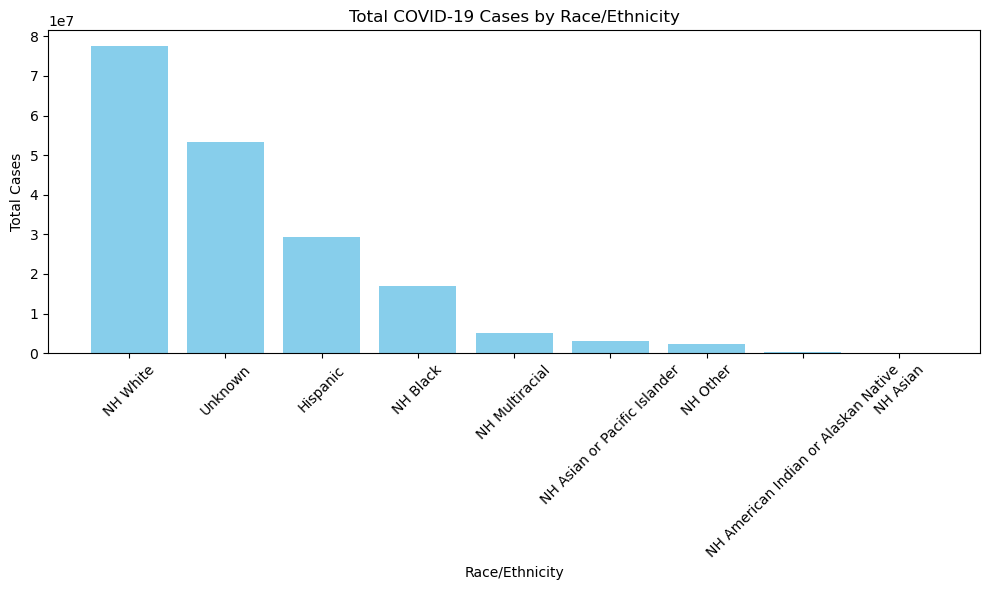

In [13]:
# Create a bar chart for the total COVID-19 cases by race/ethnicity
plt.figure(figsize=(10, 6))
plt.bar(
    cases_by_race_cleaned['Race/ethnicity'], 
    cases_by_race_cleaned['Total_Cases'], 
    color='skyblue'
)
plt.title('Total COVID-19 Cases by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [14]:
# Calculate descriptive statistics for cases by race/ethnicity
print(df_cleaned.groupby('Race/ethnicity')['Total cases'].describe())

                                      count           mean            std  \
Race/ethnicity                                                              
Hispanic                              546.0   53898.053114   39120.960949   
NH American Indian or Alaskan Native  510.0     416.962745     287.477110   
NH Asian                                1.0     215.000000            NaN   
NH Asian or Pacific Islander          510.0    5809.974510    5675.824338   
NH Black                              546.0   31181.510989   24139.566662   
NH Multiracial                        545.0    9239.592661    7938.424151   
NH Other                              307.0    7901.335505    7720.632852   
NH White                              546.0  142214.075092  123022.100285   
Unknown                               546.0   97445.615385   58610.701836   

                                         min       25%       50%        75%  \
Race/ethnicity                                                           

In [15]:
# Calculate case rate per 100,000 for each race/ethnicity group
df_cleaned['case_rate_per_100k'] = (df_cleaned['Total cases'] / df_cleaned['Total population']) * 100000

# Display case rate per 100,000
print(df_cleaned[['Race/ethnicity', 'case_rate_per_100k']])


                            Race/ethnicity  case_rate_per_100k
0                                 Hispanic        1.493704e+03
1     NH American Indian or Alaskan Native        4.808697e+02
2             NH Asian or Pacific Islander        3.804097e+02
3                                 NH Black        1.577748e+03
4                           NH Multiracial                 inf
...                                    ...                 ...
4066          NH Asian or Pacific Islander        1.098109e+04
4067                              NH Black        2.131902e+04
4068                        NH Multiracial        1.462437e+04
4069                              NH White        1.734472e+04
4070                               Unknown                 inf

[4057 rows x 2 columns]


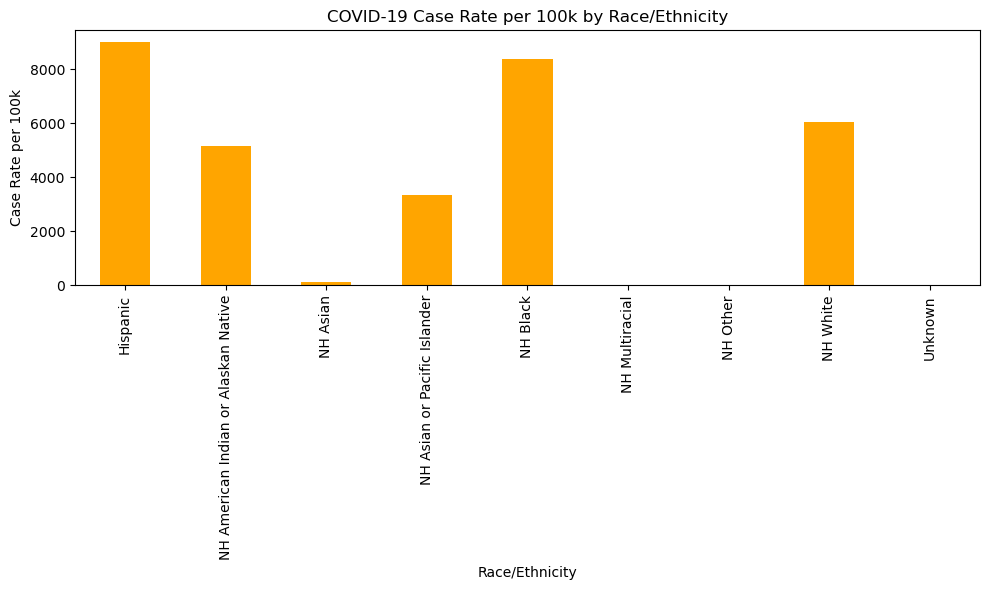

In [25]:
#bar chart of total COVID-19 cases by race/ethnicity
plt.figure(figsize=(10, 6))
df_cleaned.groupby('Race/ethnicity')['case_rate_per_100k'].mean().plot(kind='bar', color='orange')
plt.title('COVID-19 Case Rate per 100k by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Case Rate per 100k')
plt.tight_layout()
plt.show()


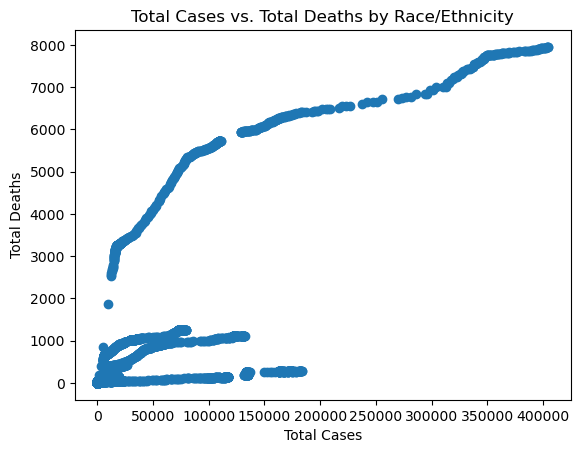

In [17]:
#Scatter plot of cases vs deaths

plt.scatter(df_cleaned['Total cases'], df_cleaned['Total deaths'])
plt.title('Total Cases vs. Total Deaths by Race/Ethnicity')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.show()


In [18]:
# Correlation between case rate and death rate
correlation = df_cleaned[['case_rate_per_100k', 'Total deaths']].corr()
print("Correlation between case rate per 100k and deaths:")
print(correlation)


Correlation between case rate per 100k and deaths:
                    case_rate_per_100k  Total deaths
case_rate_per_100k            1.000000      0.076028
Total deaths                  0.076028      1.000000


In [19]:
# Calculate the correlation between total cases and total deaths
correlation = df_cleaned[['Total cases', 'Total deaths']].corr()

# Print the correlation matrix
print("Correlation between total cases and total deaths:")
print(correlation)


Correlation between total cases and total deaths:
              Total cases  Total deaths
Total cases      1.000000      0.714432
Total deaths     0.714432      1.000000
